## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [1]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
import numpy as np
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
df[['TV','radio']]

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

/Users/wanzhiheng/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


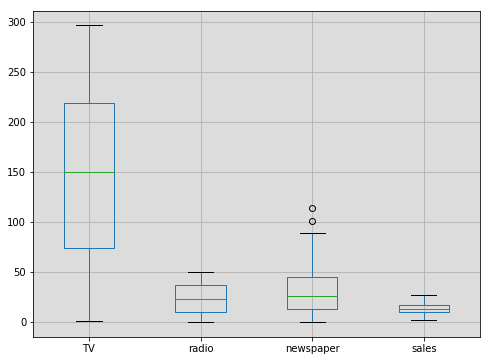

In [3]:
plt.figure(figsize=(8,6))
plt.axes(axisbg='gainsboro')
df.boxplot(medianprops=dict(color='r'))

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

In [4]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


/Users/wanzhiheng/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


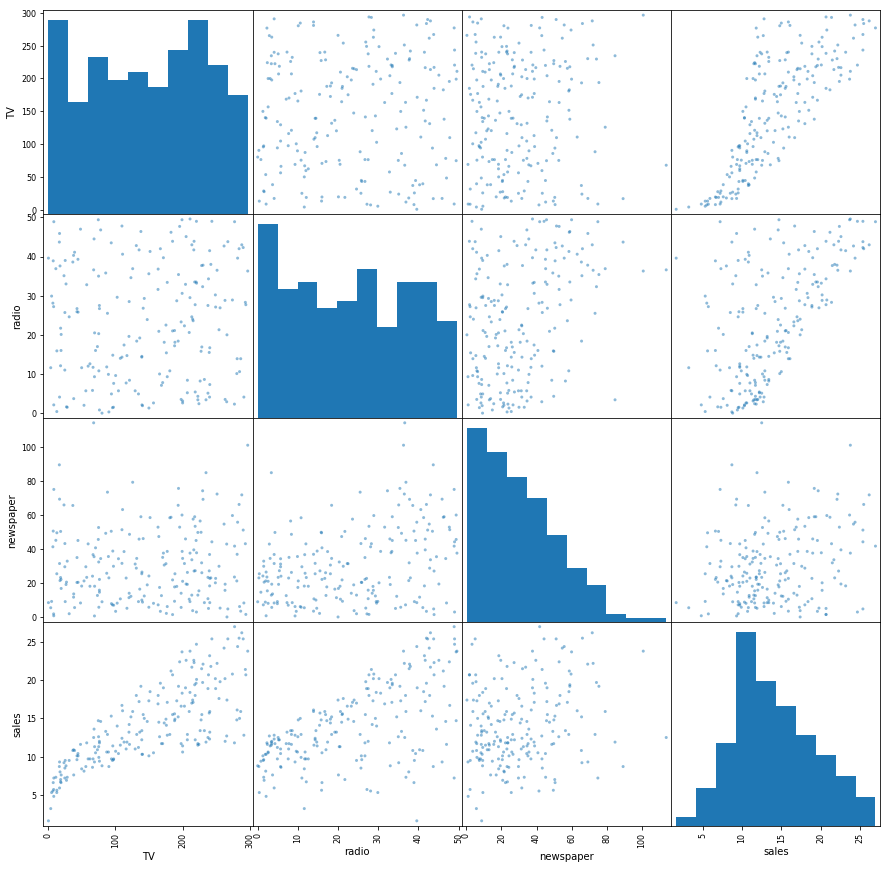

In [5]:
from pandas.tools.plotting import scatter_matrix 
scatter_matrix(df, figsize=(15,15))
plt.show()

In [6]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


Which of the variables seem correlated with one another? Which don't? Explain your answer

According to the correlation I got from the table above, I found that TV is highly correlated with sales because the correlation value is close to 0.8 which is a big number. Then, radio also seems to be correlated with sales based on the correlation value. However, newspaper has a low correlation value with sales.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

a) Set y to be the sales in df

In [8]:
# Code here
y=df[['sales']]

b) Set X to be just the features described above in df

In [9]:
# Code here
x=df[['TV','radio','newspaper']]

c) Randomly split data into training and testing - 80% training, 20% testing.

In [10]:
# Code here
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

d) Train model on training data, and make predictions on testing data

In [11]:
# Code here
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(x_test) - y_test) ** 2))

('Coefficients: \n', array([[ 0.04472952,  0.18919505,  0.00276111]]))
Residual sum of squares: 3.17


e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [12]:
# Code here
print('R^2 Score: %.2f' % regr.score(x_test, y_test))

R^2 Score: 0.90


f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

(0, 30)

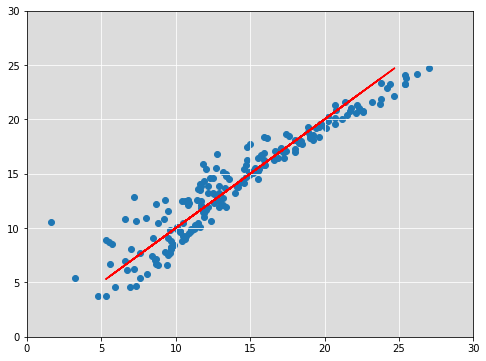

In [13]:
# Code here
import pylab as plt
plt.figure(figsize=(8,6))
plt.axes(axisbg='gainsboro')
plt.scatter(y.values,regr.predict(x))
plt.plot(y_test,y_test,'r')
plt.grid(color='white')
plt.xlim(0,30)
plt.ylim(0,30)

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Based on the R^2 value I got, R^2=0.9 is a pretty good value because the model fits bettwe with the R^2 value more close to 1. Also, looking at the plot above, the scatter also looks like fitting good with the straight line.

Try looking at LinearRegression().coef_

('Coefficients: \n', array([[ 4.04663787,  2.66458107, -0.02050924]]))
Residual sum of squares: 2.79
Variance score: 0.90


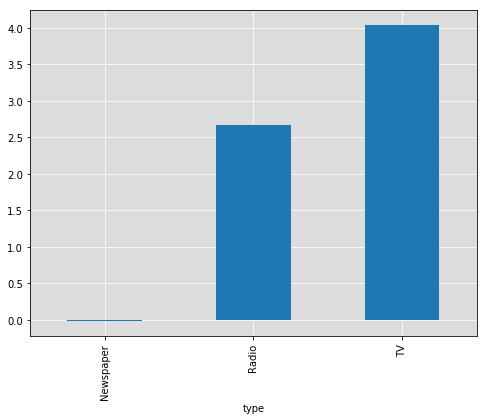

In [14]:
# Code/explanation here
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
x2 = x.as_matrix().astype(np.float)
x2 = scaler.fit_transform(x)

size = float(len(x))
X_train = x2[0:int(size*0.8)]
X_test = x2[int(size*0.8):]

# Split the targets into training/testing sets
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

plt.figure(figsize=(8,6))

plt.axes(axisbg='gainsboro')
a=np.ravel(regr.coef_)
df = pd.DataFrame({'type':['TV','Radio','Newspaper'], 'coef':a})

df.groupby('type')['coef'].mean().plot(kind='bar',zorder=5)
plt.grid(color='white',zorder=0)

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

From the graph plotted above, I found that TV has the most significant impact on Sales. Also, before the measurement of the importance of the features involved, we have to normalize each features, otherwise the plot would be inaccurate.

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

/Users/wanzhiheng/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:26: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


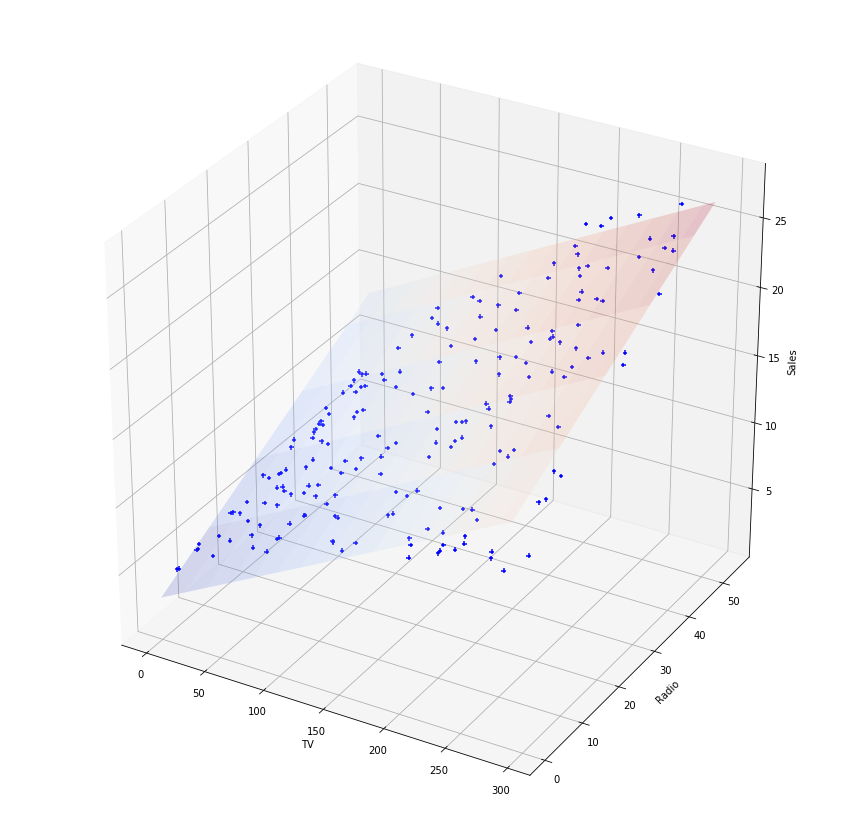

In [15]:
# Type your answer here. 

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm

csv = pd.read_csv('/Users/wanzhiheng/python-introduction-wan3231998/www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
model = sm.ols(formula='sales ~ TV + radio', data = csv)
fit = model.fit()

fit.summary()

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 300, 10)                # generate a mesh
y_surf = np.arange(0, 60, 6)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=2,
                cstride=2,
                color='darkgrey',
                alpha = 0.2,cmap=cm.coolwarm)

ax.scatter(csv['TV'], csv['radio'], csv['sales'],
           c='blue',
           marker='+',
           alpha=1)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

plt.show()

In [16]:
x['TV*Radio']=x['TV']*x['radio']
x = x.drop(['newspaper'],1)
size = float(len(x))

X_train = x[0:int(size*0.8)]
X_test = x[int(size*0.8):]

# Split the targets into training/testing sets
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

('Coefficients: \n', array([[ 0.01918396,  0.02648516,  0.00109794]]))
Residual sum of squares: 0.39
Variance score: 0.99


(0, 30)

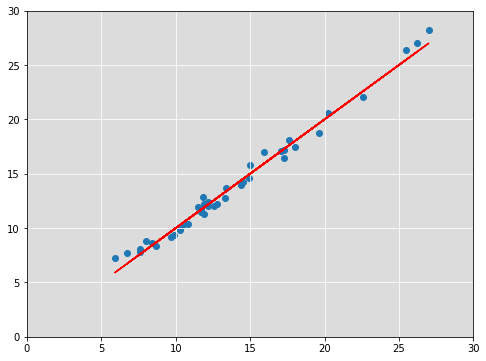

In [17]:
plt.figure(figsize=(8,6))
plt.axes(axisbg='gainsboro')
plt.scatter(y_test.values,regr.predict(X_test))
plt.plot(y_test,y_test,color='r')
plt.grid(color='white')
plt.xlim(0,30)
plt.ylim(0,30)

/Users/wanzhiheng/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:27: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Thu, 01 Mar 2018   Prob (F-statistic):          6.68e-146
Time:                        17:32:31   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.0

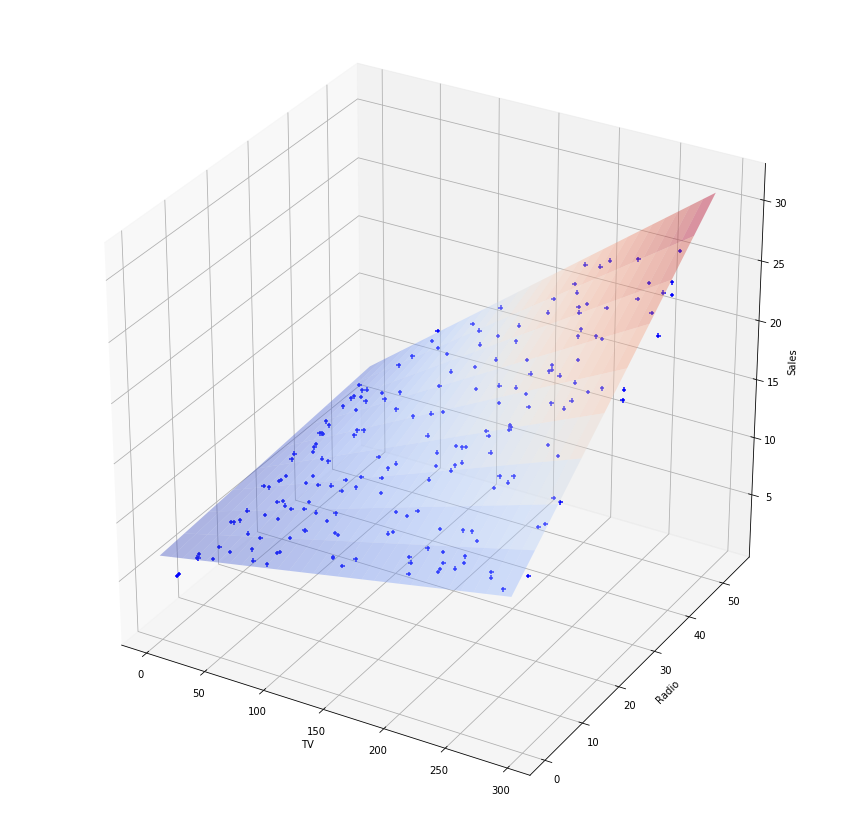

In [137]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm

csv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
model = sm.ols(formula='sales ~ TV * radio', data = csv)
fit = model.fit()

fit.summary()

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 300, 10) 
y_surf = np.arange(0, 60, 6)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})
out = fit.predict(exog = exog)

# Create surface plot
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='darkgrey',
                alpha = 0.4,cmap=cm.coolwarm)

# Create scatter plot
ax.scatter(csv['TV'], csv['radio'], csv['sales'],
           c='blue',
           marker='+',
           alpha=1)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

# Print OLS regression results
print fit.summary()

plt.show()

Using a nonlinear-non parametric model
We will see that using a non-linear model also improves performance - it allows us to more naievely apply an algorithm without really knowing the details of the non-linear interaction

In [19]:
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
y = df['sales']
X=df.drop(['sales'],1) 

from sklearn.tree import DecisionTreeRegressor

# We Choose 80% for training, 20% for testing. This should really be done randomly.
size = float(len(X))
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

# Split the targets into training/testing sets
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

# Create linear regression object
regr = DecisionTreeRegressor(max_depth=5)

# Train the model using the training sets
regr.fit(X_train, y_train)


# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

Residual sum of squares: 0.94
Variance score: 0.96


In [20]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

In [21]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

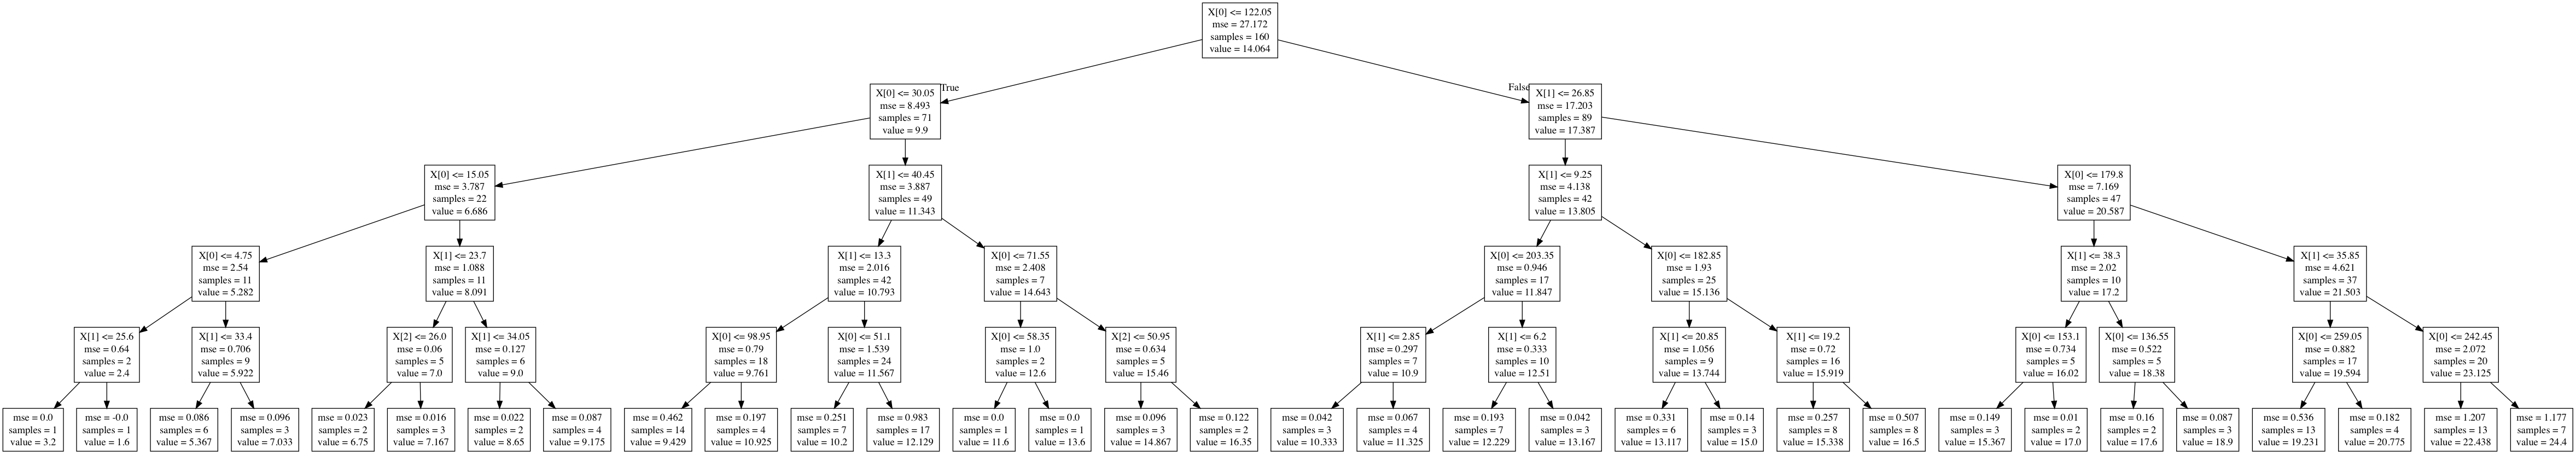

In [22]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image  
dot_data=export_graphviz(regr, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = 0.0350749705923, m = 1.47880271753, error = 112.647056643


(20, 80)

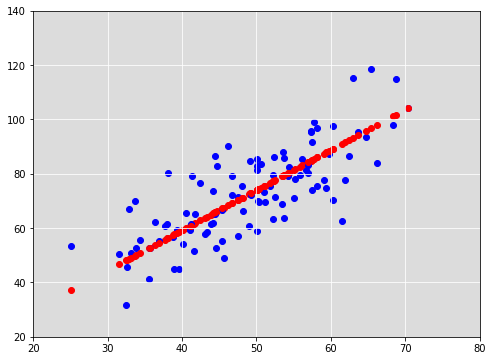

In [23]:
from numpy import *
from matplotlib import axes

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]
plt.figure(figsize=(8,6))
plt.axes(axisbg='gainsboro')

def run(num_iterations):
    points = genfromtxt('/Users/wanzhiheng/python-introduction-wan3231998/data.csv', delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    print "Running..."
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1],color='b')
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')
        

run(100)
plt.grid(color='white')
plt.ylim(20, 140)
plt.xlim(20, 80)

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 0 iterations b = 0, m = 0, error = 5565.10783448


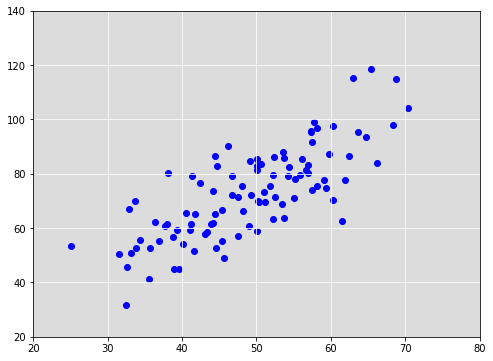

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 1 iterations b = 0.0145470101107, m = 0.737070297359, error = 1484.58655741


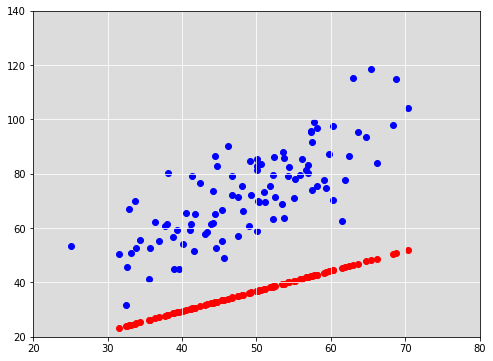

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 2 iterations b = 0.0218739629596, m = 1.10679545435, error = 457.854257574


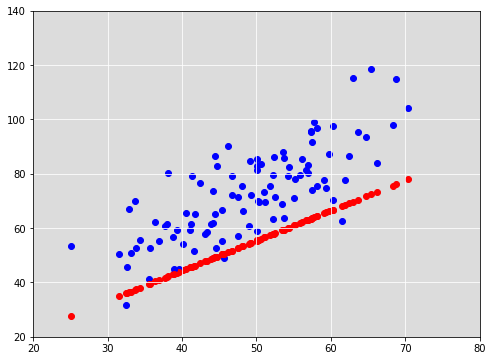

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 3 iterations b = 0.0255792243213, m = 1.29225466491, error = 199.509985726


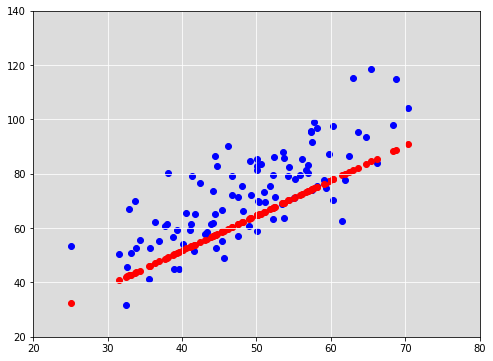

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 4 iterations b = 0.0274677895591, m = 1.38528325565, error = 134.505910582


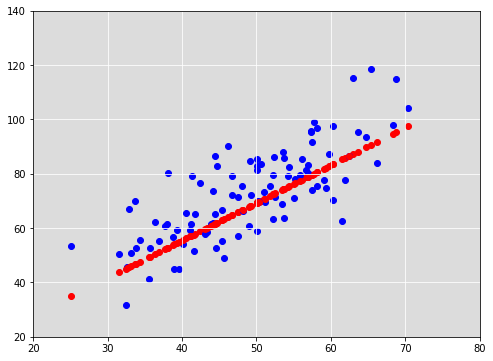

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 5 iterations b = 0.0284450719817, m = 1.43194723238, error = 118.149693422


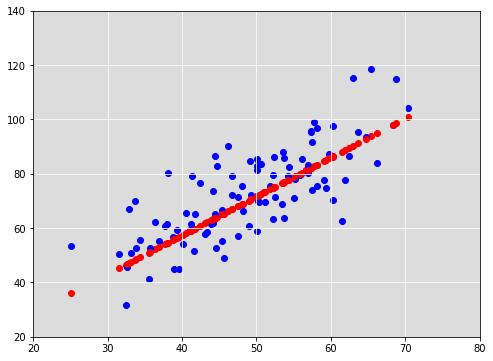

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 6 iterations b = 0.0289652407665, m = 1.4553540089, error = 114.03414906


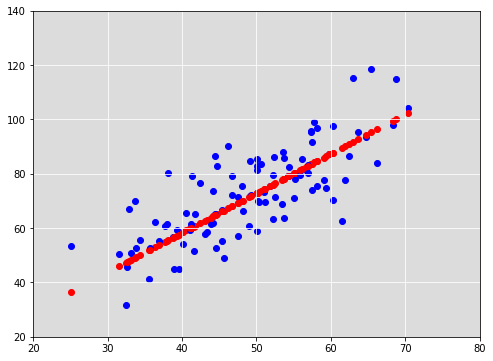

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 7 iterations b = 0.029256114126, m = 1.46709461772, error = 112.998577317


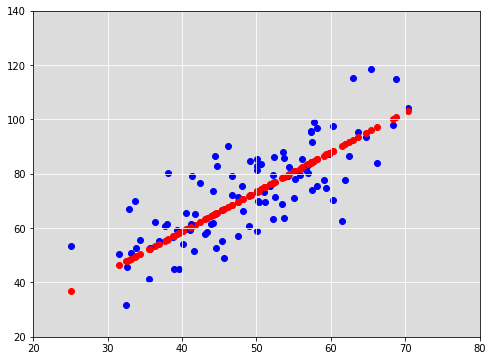

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 8 iterations b = 0.0294319691638, m = 1.47298329822, error = 112.737981876


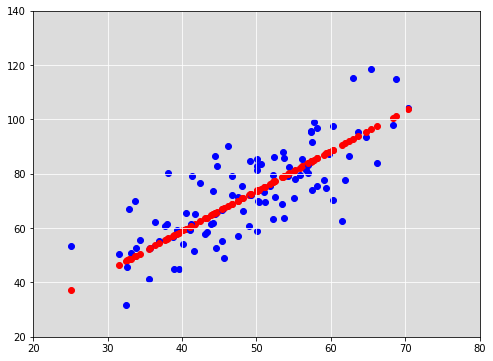

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 9 iterations b = 0.0295501290244, m = 1.4759365619, error = 112.672384359


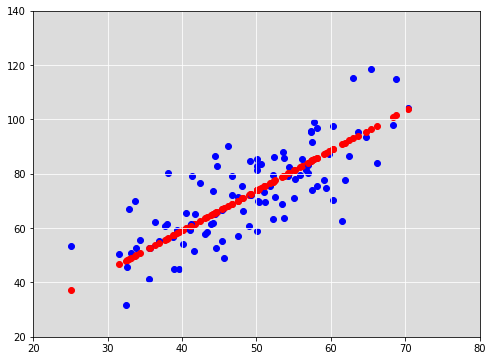

In [24]:
# Use this to visually discuss convergence rate based on learning rate
              # generate a mesh



#for num in range(0,10):
#    run(num)
#    plt.show()

for num in range(0,10):
    plt.figure(figsize=(8,6))
    plt.axes(axisbg='gainsboro')
    plt.grid(color='white')
    plt.ylim(20, 140)
    plt.xlim(20, 80)
    run(num)
    plt.show()
    
    

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

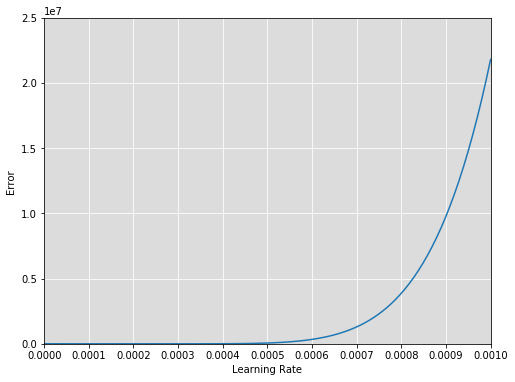

In [33]:

points = genfromtxt("/Users/wanzhiheng/python-introduction-wan3231998/data.csv", delimiter=",")

initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 3
errors=[]
plt.figure(figsize=(8,6))
plt.axes(axisbg='gainsboro')
for l in np.linspace(0,0.001,100):
    learning_rate = l
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    errors.append(compute_error_for_line_given_points(b, m, points))

scale=np.linspace(0,0.0010,11)   
plt.xticks(scale)
plt.xlabel('Learning Rate')
plt.ylabel('Error ')
plt.xlim(0, 0.0010)
plt.ylim(0, 2.5e+7)
plt.grid(color='white')
plt.plot(learning_rates,errors,label='num_iterations='+str(num_iterations))


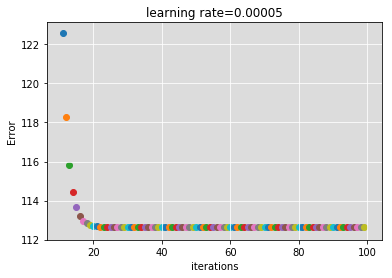

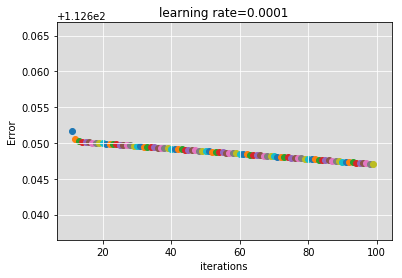

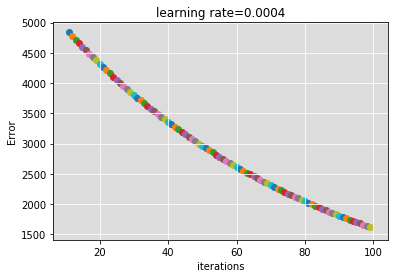

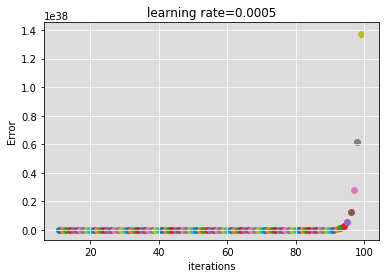

In [136]:
def learningrate_run(iterations,learningrate):
    points = genfromtxt("/Users/wanzhiheng/python-introduction-wan3231998/data.csv", delimiter=",")
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    errors=[]
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learningrate , iterations)
    errors.append(compute_error_for_line_given_points(b, m, points))

    plt.scatter(jj, errors)
    plt.grid(color='white')
    plt.xlabel('iterations')
    plt.ylabel('Error')
    plt.axes(axisbg='gainsboro')

titles = ['learning rate=0.00001', 'learning rate=0.0001', 'learning rate=0.0004', 'learning rate=0.0005']
learning_rate=[0.00005,0.0001,0.0004,0.0005]


for jj in range(10,100):
    learningrate_run(jj,0.00005)
plt.title('learning rate=0.00005')
plt.show()

for jj in range(10,100):
    learningrate_run(jj,0.0001)
plt.title('learning rate=0.0001')
plt.show()
    
for jj in range(10,100):
    learningrate_run(jj,0.0004)
plt.title('learning rate=0.0004')
plt.show()
   
for jj in range(10,100):
    learningrate_run(jj,0.0005)
plt.title('learning rate=0.0005')
plt.show()
    



                

First, we got a good fit learning rate iteration, and from the learning rate vs. Error plot above, we showed that effects caused by modifying the learning rate parameter on the convergenc and divergence of gradient descent method. Then ,from 10 to 100 iterations, we found that when learning rate is equal to 0.0001, it played as fastest convergence;When learning rate is equal to 0.00005, it played as less fast convergence because its absolute arror is around 31;When the rate is equal to 0.0004, it results in a slower convergence that the error is so high up to nearly 3000;When the rate if 0.0005, it turns to slow divergence which the error is increasing as the increase of iterations. Finally, small learning rate might cause very slow solution. Also, we have to be careful to a large number of learning rate which might take large step size that can be confronted with the minimum.size, and thus the divergence would occur!